In [15]:
import datetime
import os

from obs_data import * 
from plotFunctions import *
import mpld3
mpld3.enable_notebook()

import seaborn as sns
sns.set_context(rc={'lines.markeredgewidth': 0.1})
sns.set(style="whitegrid")

# Plot graphs within this document
%matplotlib inline

print(os.getcwd())

PC = True

D:\Documents\these_pablo\Models\BEACH2016\Analysis


### Model version to inspect

In [2]:
version = "v5"

In [3]:
if PC:
    back = "\\"  
    sim_path = version + back  
else:
    back = "/"
    sim_path = version + back
    
print(path, sim_path)

('Data/qmBlk_R.csv', 'v5\\')


### Nash comparisons

In [4]:
start = 1
n_tests = 11
for i in range(start, n_tests+1):
    folder = str(i)
    col = 'Nash.c' + str(i)
    nash = pd.read_table(sim_path + folder + back + "res_nash_q_m3.tss", skiprows=4, delim_whitespace=True,
                         names=['Jdays', col],
                         header=None)
    if i == 1:
        nash_all = nash
    else:
        nash_all = nash_all.merge(nash, left_on='Jdays', right_on='Jdays', how='outer')

data = nash_all[200:]

In [5]:
data.head()

,Jdays,Nash.c1,Nash.c2,Nash.c3,Nash.c4,Nash.c5,Nash.c6,Nash.c7,Nash.c8,Nash.c9,Nash.c10,Nash.c11
200,201,0.828933,0.763387,0.828945,0.653897,0.729930,0.828939,0.828926,0.814238,0.779163,0.824206,0.832695
201,202,0.828352,0.752288,0.826326,0.640240,0.724924,0.828360,0.828343,0.814206,0.776435,0.822852,0.832625
202,203,0.821079,0.738509,0.825201,0.629386,0.721123,0.821088,0.821066,0.807909,0.767597,0.814310,0.826750
203,204,0.811587,0.729305,0.816302,0.620562,0.711994,0.811596,0.811574,0.798463,0.758293,0.804843,0.817239
204,205,0.800695,0.718640,0.805399,0.610198,0.701385,0.800704,0.800681,0.787608,0.747550,0.793970,0.806331


### Nash models 1 - 5

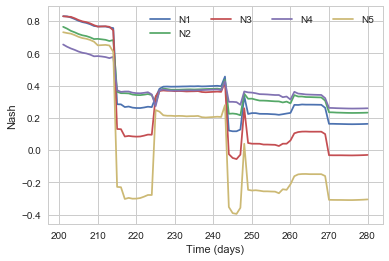

In [6]:
start = 1
n_tests = 6

fig, ax1 = plt.subplots()
time = data.iloc[:, 0]
legend = []

for i in range(start, n_tests):
    l = "N" + str(i)
    legend.append(l)
for i in range(1, n_tests):
    ax1.plot(time, data.iloc[:, i], label=legend[i-start])
ylabel = 'Nash'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel(ylabel)
plt.legend(loc='upper right', bbox_to_anchor=(1., 1), ncol=4, shadow=True, fancybox=True)
plt.show()

### Nash models 6 - 11

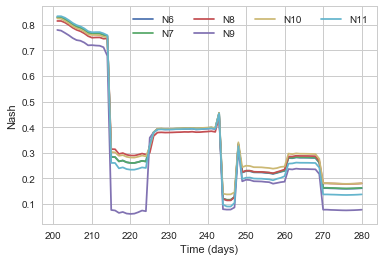

In [17]:
start = 6
n_tests = 11

fig, ax1 = plt.subplots()
time = data.iloc[:, 0]
legend = []

for i in range(start, n_tests+1):
    l = "N" + str(i)
    legend.append(l)
for i in range(start, n_tests+1):
    ax1.plot(time, data.iloc[:, i], label=legend[i-start])
ylabel = 'Nash'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel(ylabel)
plt.legend(loc='upper right', bbox_to_anchor=(1., 1), ncol=4, shadow=True, fancybox=True)
plt.show()

## Plotting discharge 


**Observations = "obs"**

**Simulation = "Scenario 4, simQ"**

Base model:
- c1 = 0.25
- drain_coef = 0.8
- z0 = 10 mm

Best combinations:
- Sc.4: c1 -= 0.15
- Sc.2: drain_coef += 0.15
- Sc.8: z0 x= 1.15
- Sc.10: s1 += 0.15

**Decreases** in lateral flow and **increases** in percolation potential improve nash coefficients. 

In [8]:
obs.head()

,DayMoYr,Date,Jdays,VolTot.L,ConSmOut_ugL.blk,ConSmOut_ugL.sd,ConOxOut_ugL.blk,ConOxOut_ugL.sd,ConEsOut_ugL.blk,ConEsOut_ugL.sd,deltaOut.blk,deltaOut.sd,SubWeeks
0,2015-10-01,01/10/2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-10-02,02/10/2015,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-10-03,03/10/2015,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-10-04,04/10/2015,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-10-05,05/10/2015,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
"""
Import simulated data 
Observations are already imported above.
"""
# Edit observations (select relevant columns)
obs['DayMoYr'] = pd.to_datetime(obs['DayMoYr'])  # Convert to Date object
obs = obs[['DayMoYr', 'Jdays', 'VolTot.L']]  # keep desired columns
obs['Q_obs.m3'] = obs['VolTot.L'] * 1 / 10 ** 3

# def liters_to_m3(row):
#     val = row['VolTot.L'] * 1 / 10 ** 3
#     return val

# obs['Q_obs.m3'] = obs.apply(liters_to_m3, axis=1)

# Simulated Start time
yy = 2015
mm = 10
dd = 1
dt = datetime.date(yy, mm, dd)

folder = "4"
# print(path)
simQ = pd.read_table(sim_path + folder + back + "res_accuVol_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'Q_sim.m3'],
                         header=None)


C:\Users\pablo\AppData\Local\Continuum\Anaconda3\envs\Python27-PyCharm\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
simQ = simQ[160:300]
simQ.head()

,dt,Q_sim.m3
160,161,76.125000
161,162,20.282400
162,163,0.224389
163,164,0.046761
164,165,0.025045


In [11]:
obs = obs[160:300]
obs.head()

,DayMoYr,Jdays,VolTot.L,Q_obs.m3
160,2016-03-09,161,NaN,NaN
161,2016-03-10,162,NaN,NaN
162,2016-03-11,163,NaN,NaN
163,2016-03-12,164,NaN,NaN
164,2016-03-13,165,NaN,NaN


In [12]:
mData = obs.merge(simQ, left_on='Jdays', right_on='dt', how='outer')
mData = mData.drop(['VolTot.L', 'dt'], axis=1)
mData.tail()

,DayMoYr,Jdays,Q_obs.m3,Q_sim.m3
135,2016-07-22,296,NaN,NaN
136,2016-07-23,297,NaN,NaN
137,2016-07-24,298,NaN,NaN
138,2016-07-25,299,NaN,NaN
139,2016-07-26,300,NaN,NaN


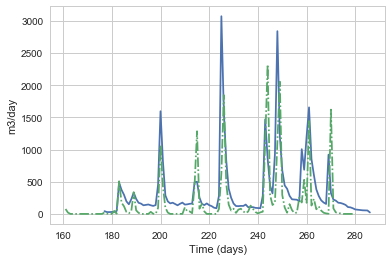

In [16]:
fig, ax1 = plt.subplots()
time = mData.iloc[:, 1]
obs_vol = mData['Q_obs.m3']
sim_vol = mData['Q_sim.m3']
legend = ["Q-obs (m3/d)", "Q-sim (m3/d)"]

ax1.plot(time, obs_vol, label=legend[0])
ax1.plot(time, sim_vol, linestyle='dashdot', label=legend[1])
ylabel = 'm3/day'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel(ylabel)
plt.show()

In [14]:
obs.dtypes
# basic_plot(obs)

DayMoYr     datetime64[ns]
Jdays                int64
VolTot.L           float64
Q_obs.m3           float64
dtype: object

Next tests:
- Increase Ksat; Group B -> Group A
- Increase drain_coef; 0.8 -> 0.9
- Decrease c1 and c2; 0.25 -> 0.1 
- Stop z2 percolation at day >= 180

Preparation:
- Soil maps